# Overview
This is our teams first attempt to explore the MTA Data!!

-  Stations with maximum traffic 
    - Traffic = Entries + Exit
-  Aggregated Traffic by Month for all stations
-  Aggregate data by time across stations
-  Office Locations by Stations
-  Explore data for 2 years
-  Cleaning Data
    -  See if there any nulls
    -  See if the station names have errors
    
    


Below are some Maps and images for visual reference:
<img src="MTA_RAIL_MAP.jpg" width="500" height="600"></img>
<img src="TechCompany_MAP.png" width="500" height="600"></img>

|S.No |Neighborhood   |  %|
|------|--------------|----| 
|1.| Financial District|    39%|
|2.| Midtown South|    32%|
|3.| Turtle Bay|    31%|
|4.| Murray Hill|    30%|
|5.| Noho|    30%||
|6.| Fulton/Seaport |   29%|
|8.| Greenwich Village |   28%|
|9.| Upper East Side|    27.5%
|10.| Kips Bay|    27%|
|11.| Chelsea|    27%|
|12.| West Chelsea|    27%|
|13.| Hunters Point|    26%|
|14.| Jamaica Estates|    26%|
|15.| Yorkville|    26%|

In [108]:
# import the python libraries
import pandas as pd
import numpy as np
import math


In [107]:
# This file is a merged across the two years of MTA Turnstile data
#The data file is merged using shell script
# The files were downloaded, scraped and Cleaned using a mix of Beautiful Soup and Shell Script SED commands
# This is relatively a large file
mta_data = pd.read_csv("merged_file.txt")

In [106]:
# Sample Reference for a single file
mta_data_1df = pd.read_csv("turnstile_190330.txt")

## Exploring the Data

The next steps we will explore the data to get a better understanding of the data

In [101]:
# Lets look at the
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,03:00:00,REGULAR,6463109,2187558
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,07:00:00,REGULAR,6463119,2187567
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,11:00:00,REGULAR,6463178,2187654
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,15:00:00,REGULAR,6463373,2187736
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,19:00:00,REGULAR,6463712,2187803


In [102]:
len(mta_data)

10346286

In [33]:
# Looking at the Stations, it may be easiest to place 
stations = mta_data["STATION"].unique()
stations_1df = mta_data_1df["STATION"].unique()

In [104]:
# Print the number of Stations
print len(stations), len(stations_1df)
 

379 377


In [45]:
stations_1df_set = set(stations_1df)
station_set =  set(stations)
station_set.difference(stations_1df_set)

{'ASTORIA BLVD', 'ORCHARD BEACH'}

In [73]:
mta_cleaned_data = mta_data[(mta_data.EXITS != 0) | (mta_data.ENTRIES != 0)]

### Group by


In [62]:
mta_entries_exit_by_station = mta_cleaned_data.groupby(['STATION'])[["ENTRIES","EXITS"]].agg('sum')

In [63]:
list(mta_cleaned_data)

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS',
 'TOTAL']

In [64]:
mta_entries_exit_by_station.describe()

,ENTRIES,EXITS
count,3.790000e+02,3.790000e+02
mean,1.090337e+12,8.949733e+11
std,2.436309e+12,2.241357e+12
min,3.533728e+08,2.119119e+07
25%,3.368167e+10,2.095275e+10
50%,1.197271e+11,5.559705e+10
75%,6.058893e+11,2.801909e+11
max,1.682874e+13,1.536059e+13


In [65]:
mta_entries_exit_by_station.sort_values(by="ENTRIES", ascending=False).head(10)

,ENTRIES,EXITS
STATION,,
42 ST-PORT AUTH,16828740462843,13744032052758
23 ST,13321602809454,14827887044990
TIMES SQ-42 ST,12910320237132,10022219506020
CANAL ST,12611684827065,13019237465731
34 ST-HERALD SQ,11914849351701,15360594926974
CHAMBERS ST,11156245512265,9780314452762
125 ST,10610710045989,5641680603273
104 ST,10595786665982,7701347630057
14 ST,10127543642334,7169198651179


In [15]:
mta_entries_exit_by_station.sort_values(by="EXITS", ascending=False).head(10)

,ENTRIES,EXITS
STATION,,
34 ST-HERALD SQ,11914849351701,15360594926974
23 ST,13321602809454,14827887044990
42 ST-PORT AUTH,16828740462843,13744032052758
CANAL ST,12611684827065,13019237465731
72 ST,7895307420579,10394786470178
TIMES SQ-42 ST,12910320237132,10022219506020
CHAMBERS ST,11156245512265,9780314452762
FULTON ST,9482158762720,9549060309270
HIGH ST,6046892240570,8134440530949


In [66]:
mta_cleaned_data['TOTAL'] = mta_cleaned_data['ENTRIES'] + mta_cleaned_data['EXITS']

/Users/shivajidutta/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
mta_cleaned_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,03:00:00,REGULAR,6463109,2187558,8650667
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,07:00:00,REGULAR,6463119,2187567,8650686
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,11:00:00,REGULAR,6463178,2187654,8650832
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,15:00:00,REGULAR,6463373,2187736,8651109
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,19:00:00,REGULAR,6463712,2187803,8651515
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,23:00:00,REGULAR,6463887,2187833,8651720
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2017,03:00:00,REGULAR,6463926,2187844,8651770
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2017,07:00:00,REGULAR,6463938,2187856,8651794
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2017,11:00:00,REGULAR,6463980,2187919,8651899
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2017,15:00:00,REGULAR,6464138,2187969,8652107


In [40]:
mta_total_by_station = mta_cleaned_data.groupby(['STATION'], as_index=False)[["TOTAL"]].agg('sum')

In [41]:
mta_top_10_stations = mta_total_by_station.sort_values(by="TOTAL", ascending=False).head(10)

## Graphing

This is to graph the data

* !pip install seaborn

In [42]:
import matplotlib as plt

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [74]:
mta_total_by_station

,STATION,TOTAL
0,1 AV,9815464826770
1,103 ST,1848762107626
2,103 ST-CORONA,295930712959
3,104 ST,18297134296039
4,110 ST,152070148160
5,111 ST,395570765925
6,116 ST,7280996156929
7,116 ST-COLUMBIA,3271327532157
8,121 ST,1452666019019
9,125 ST,16252390649262


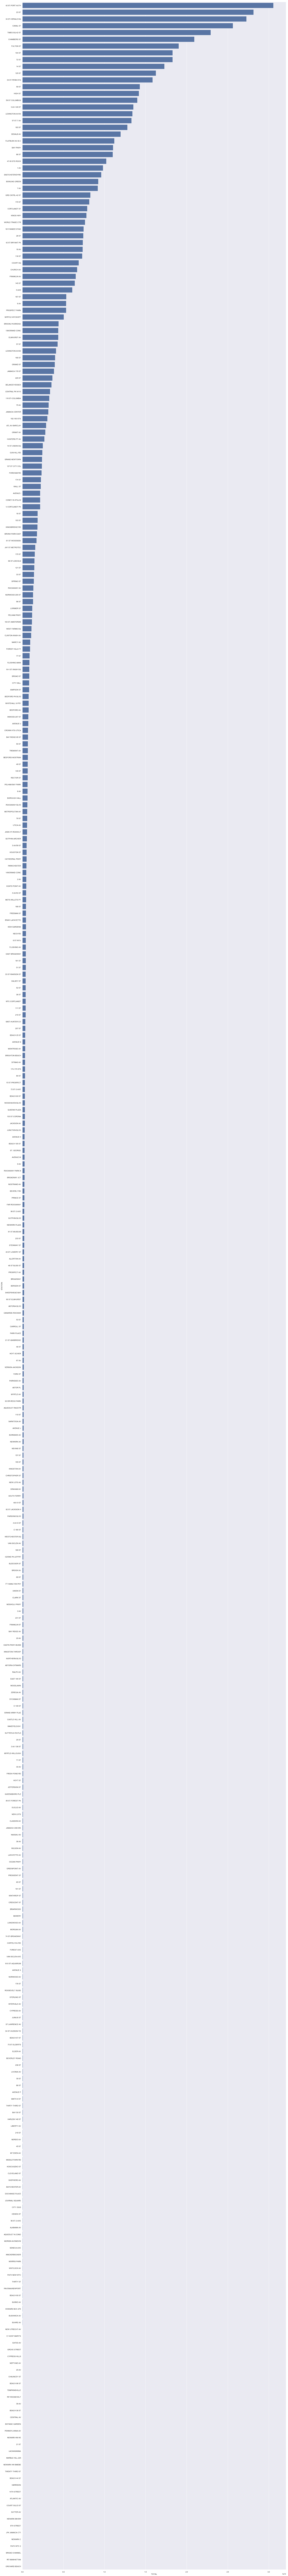

In [109]:
plt.figure(figsize=(30,300))
mta_total_by_station = mta_total_by_station.sort_values(by="TOTAL", ascending=False)
sns.barplot(y='STATION', x='TOTAL', data=mta_total_by_station, color='b');

In [45]:
mta_top_10_stations

,STATION,TOTAL
68,42 ST-PORT AUTH,30572772515601
46,23 ST,28149489854444
59,34 ST-HERALD SQ,27275444278675
173,CANAL ST,25630922292796
353,TIMES SQ-42 ST,22932539743152
180,CHAMBERS ST,20936559965027
226,FULTON ST,19031219071990
3,104 ST,18297134296039
97,72 ST,18290093890757
13,14 ST,17296742293513


In [46]:
mta_cleaned_data.describe()

,ENTRIES,EXITS,TOTAL
count,1.034446e+07,1.034446e+07,1.034446e+07
mean,3.994771e+07,3.279000e+07,7.273771e+07
std,2.070538e+08,1.912516e+08,3.773676e+08
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.801810e+05,2.286080e+05,8.905172e+05
50%,2.498764e+06,1.413961e+06,4.710246e+06
75%,6.904690e+06,4.810978e+06,1.241259e+07
max,2.144893e+09,2.146093e+09,3.968876e+09


In [47]:
list(mta_cleaned_data)

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS',
 'TOTAL']

In [81]:
for i in mta_cleaned_data["TIME"].unique():
    print i

03:00:00
07:00:00
11:00:00
15:00:00
19:00:00
23:00:00
11:20:58
01:00:00
05:00:00
09:00:00
13:00:00
17:00:00
21:00:00
09:19:20
11:21:00
14:56:36
11:37:18
13:59:18
00:00:00
04:00:00
08:00:00
12:00:00
16:00:00
20:00:00
14:20:49
14:22:12
11:21:03
11:21:05
09:19:24
08:56:29
11:21:12
14:56:42
15:46:18
15:47:38
15:48:59
15:50:37
15:51:56
15:53:16
14:20:56
14:22:22
14:21:08
11:15:51
02:00:00
06:00:00
10:00:00
14:00:00
18:00:00
22:00:00
11:15:55
11:21:27
15:15:42
07:54:12
07:55:32
07:56:53
07:58:13
07:59:34
08:00:54
10:00:43
10:02:03
10:03:24
10:04:44
10:06:04
10:07:26
10:18:50
10:20:11
10:21:31
10:22:51
10:24:12
10:25:32
11:18:39
15:43:50
15:45:11
15:46:31
15:47:51
15:49:16
15:50:36
15:51:59
15:53:20
15:44:13
15:45:34
15:46:56
15:48:27
08:56:32
11:18:43
11:18:48
08:56:34
11:18:50
11:18:54
09:19:27
11:18:58
08:56:37
14:19:04
15:44:26
15:45:48
15:47:10
12:29:54
11:19:02
15:44:41
15:46:01
15:47:22
15:48:45
15:50:05
15:51:25
15:52:48
15:54:08
08:20:05
11:19:05
14:19:10
11:15:33
16:00:01
11:19:10
1

01:05:53
05:17:53
09:29:53
13:41:53
17:53:53
22:05:53
02:17:53
06:29:53
10:41:53
15:07:53
19:19:53
23:31:53
03:43:53
07:55:53
12:07:53
16:19:53
20:31:53
00:43:53
04:55:53
09:07:53
13:19:53
17:31:53
21:43:53
01:55:53
05:39:53
10:19:53
14:31:53
18:43:53
22:55:53
03:07:53
07:19:53
11:31:53
15:43:53
19:55:53
00:07:53
04:19:53
08:31:53
12:43:53
16:55:53
21:07:53
01:53:10
06:05:10
10:17:10
14:29:10
18:41:10
22:53:10
03:05:10
07:17:10
11:29:10
15:41:10
19:53:10
00:05:10
04:17:10
08:29:10
12:41:10
16:53:10
21:05:10
01:17:10
05:29:10
09:41:10
13:53:10
18:05:10
22:17:10
02:29:10
06:41:10
10:53:10
15:05:10
19:17:10
23:29:10
03:41:10
07:53:10
12:05:10
16:17:10
20:29:10
00:41:10
04:53:10
09:05:10
13:17:10
17:29:10
21:41:10
03:57:27
08:09:27
12:21:27
16:33:27
20:45:27
00:57:27
05:09:27
09:21:27
13:33:27
17:45:27
21:57:27
02:09:27
06:21:27
10:33:27
14:45:27
18:57:27
23:09:27
03:21:27
07:33:27
11:45:27
15:57:27
20:09:27
00:21:27
04:33:27
08:45:27
12:57:27
17:23:27
21:35:27
01:47:27
05:59:27
10:11:27
1

09:41:07
13:53:07
18:05:07
22:17:07
02:29:07
06:41:07
10:54:06
15:06:06
19:18:06
23:30:06
03:42:06
07:54:06
12:06:06
16:18:06
20:30:06
00:56:06
05:08:06
09:20:06
13:32:06
17:44:06
21:56:06
02:08:06
06:20:06
10:32:06
14:44:06
18:56:06
23:08:06
03:20:06
07:32:06
11:44:06
15:56:06
20:08:06
02:09:21
06:21:21
10:33:21
14:45:21
18:57:21
23:09:21
03:21:21
07:33:21
11:45:21
15:57:21
20:09:21
00:21:21
04:33:21
08:45:21
12:57:21
17:09:21
21:21:21
01:33:21
05:45:21
09:57:21
14:09:21
18:21:21
22:33:21
02:45:21
06:57:21
11:09:21
15:21:21
19:33:21
23:45:21
03:57:21
08:09:21
12:21:21
16:33:21
20:45:21
00:57:21
05:09:21
09:21:21
13:33:21
17:45:21
21:57:21
06:55:49
15:19:49
19:31:49
23:43:49
03:55:49
08:07:49
12:19:49
16:31:49
20:43:49
00:55:49
05:07:49
13:31:49
17:43:49
21:55:49
02:07:49
06:19:49
10:31:49
14:43:49
18:55:49
23:07:49
02:55:47
07:07:47
11:19:47
15:31:47
19:43:47
23:55:47
04:07:47
08:19:47
12:31:47
16:43:47
20:55:47
01:07:47
05:19:47
09:31:47
13:43:47
17:55:47
22:07:47
02:19:47
06:31:47
1

06:22:22
10:34:22
15:00:22
19:12:22
23:24:22
03:36:22
07:48:22
12:00:22
16:12:22
20:24:22
00:36:22
04:48:22
09:00:22
13:12:22
17:24:22
21:36:22
01:48:22
06:00:22
10:12:22
14:24:22
18:36:22
22:48:22
00:27:47
04:39:47
08:51:47
13:03:47
17:15:47
21:27:47
01:39:47
05:51:47
10:03:47
14:15:47
18:27:47
22:39:47
02:51:47
07:03:47
11:15:47
15:27:47
19:39:47
23:51:47
04:03:47
08:15:47
12:27:47
16:39:47
20:51:47
01:03:47
05:15:47
09:27:47
13:39:47
17:51:47
22:03:47
02:15:47
06:27:47
10:39:47
14:51:47
19:03:47
23:15:47
03:27:47
07:53:47
12:05:47
16:17:47
20:29:47
02:25:04
06:37:04
10:49:04
15:01:04
19:13:04
23:25:04
03:37:04
07:49:04
12:01:04
16:13:04
20:25:04
00:37:04
04:49:04
09:01:04
13:13:04
17:25:04
21:37:04
01:49:04
06:01:04
10:13:04
14:25:04
18:37:04
22:49:04
03:01:04
07:13:04
11:25:04
15:37:04
19:49:04
00:01:04
04:13:04
08:25:04
12:37:04
16:49:04
21:01:04
01:13:04
05:25:04
09:37:04
13:49:04
18:01:04
22:13:04
00:52:33
05:04:33
09:16:33
13:28:33
17:40:33
21:52:33
02:04:33
06:16:33
10:28:33
1

15:46:49
19:58:49
00:10:49
04:22:49
08:34:49
12:46:49
16:58:49
21:10:49
00:44:04
04:56:04
09:08:04
13:20:04
17:32:04
21:44:04
01:56:04
06:08:04
10:20:04
14:32:04
18:44:04
22:56:04
03:08:04
07:20:04
11:32:04
15:44:04
19:56:04
00:08:04
04:20:04
08:32:04
12:44:04
16:56:04
21:08:04
01:20:04
05:32:04
09:44:04
13:56:04
18:08:04
22:20:04
02:32:04
06:44:04
10:56:04
15:22:04
19:34:04
23:46:04
03:58:04
08:10:04
12:22:04
16:34:04
20:46:04
02:02:11
06:14:11
10:26:11
14:38:11
19:04:11
23:16:11
03:28:11
07:40:11
12:06:11
16:18:11
20:30:11
00:42:11
04:54:11
09:06:11
13:18:11
17:30:11
21:42:11
01:54:11
06:06:11
10:18:11
14:30:11
18:42:11
22:54:11
03:06:11
07:18:11
11:30:11
15:42:11
19:51:51
00:03:51
04:15:51
08:27:51
12:39:51
16:51:51
21:03:51
00:41:50
04:53:50
09:05:50
13:17:50
17:29:50
21:41:50
01:53:50
06:05:50
10:17:50
14:29:50
18:41:50
22:53:50
12:32:29
16:44:29
20:56:29
01:50:48
06:02:48
10:14:48
14:26:48
18:38:48
22:50:48
03:02:48
07:14:48
11:26:48
15:38:48
19:50:48
00:02:48
04:14:48
08:26:48
1

06:43:07
10:55:07
15:07:07
19:19:07
23:31:07
03:43:07
07:55:07
13:19:07
17:31:07
21:43:07
01:55:07
06:07:07
10:19:07
14:31:07
18:43:07
22:55:07
04:03:46
08:15:46
12:27:46
16:39:46
20:51:46
01:03:46
05:15:46
09:27:46
13:39:46
17:51:46
22:03:46
02:15:46
06:27:46
10:39:46
14:51:46
19:03:46
23:15:46
03:27:46
07:39:46
11:51:46
16:03:46
20:15:46
00:27:46
04:39:46
08:51:46
13:03:46
17:15:46
21:27:46
01:39:46
05:51:46
10:03:46
14:15:46
18:27:46
22:39:46
02:51:46
07:03:46
11:15:46
15:27:46
19:39:46
23:51:46
00:33:14
04:45:14
13:09:14
17:21:14
21:33:14
01:45:14
05:57:14
10:09:14
14:21:14
18:33:14
22:45:14
02:57:14
07:09:14
11:21:14
15:33:14
19:45:14
23:57:14
04:09:14
08:21:14
12:33:14
16:45:14
20:57:14
01:09:14
05:21:14
09:33:14
13:45:14
17:57:14
22:09:14
02:21:14
06:33:14
10:45:14
14:57:14
19:09:14
23:21:14
03:33:14
07:45:14
11:57:14
16:09:14
20:21:14
01:42:39
05:54:39
10:06:39
14:18:39
18:30:39
22:42:39
02:54:39
07:06:39
15:30:39
19:42:39
23:54:39
04:06:39
08:18:39
12:30:39
16:42:39
20:54:39
0

01:35:55
05:47:55
09:59:55
14:11:55
18:23:55
22:35:55
02:47:55
06:59:55
11:11:55
15:23:55
19:35:55
23:47:55
03:59:55
08:11:55
12:37:55
16:49:55
21:01:55
02:06:12
06:18:12
10:30:12
14:42:12
18:54:12
23:06:12
03:18:12
07:30:12
11:42:12
20:06:12
00:18:12
04:30:12
08:37:45
12:49:45
17:01:45
21:13:45
01:25:45
05:37:45
09:49:45
14:01:45
18:13:45
22:25:45
02:37:45
06:49:45
11:01:45
15:13:45
19:25:45
23:37:45
03:49:45
08:01:45
12:13:45
16:25:45
20:37:45
00:49:45
05:01:45
09:13:45
13:25:45
17:37:45
21:49:45
04:22:42
08:34:41
12:46:41
16:58:41
21:10:41
01:22:41
05:34:41
09:46:41
13:58:41
18:10:41
22:22:41
02:34:41
06:46:41
10:58:41
15:10:41
19:22:41
23:34:41
02:11:02
06:23:02
10:35:02
14:47:02
18:59:02
23:11:02
03:23:02
07:35:02
11:47:02
15:59:02
20:11:02
00:23:02
04:35:02
08:47:02
12:59:02
17:11:02
21:23:02
01:35:02
05:47:02
09:59:02
14:11:02
08:25:02
12:37:02
16:49:02
21:01:02
01:13:02
05:25:02
09:37:02
13:49:02
18:01:02
22:13:02
01:18:20
05:30:20
09:42:20
13:54:20
18:06:20
22:18:20
02:30:20
0

11:57:31
16:09:31
20:21:31
00:33:31
04:45:31
08:57:31
13:09:31
17:21:31
21:33:31
02:45:18
06:57:18
11:09:18
15:21:18
19:33:18
23:45:18
03:57:18
08:09:18
12:21:18
16:33:18
20:45:18
00:57:18
05:09:18
09:21:18
13:33:18
17:43:58
21:55:58
02:07:58
06:19:58
10:31:58
14:38:47
02:00:39
06:12:39
10:24:39
14:36:39
18:48:39
23:00:39
03:12:39
07:24:39
11:36:39
20:00:39
00:12:39
04:24:39
08:36:39
12:48:39
17:00:39
21:12:39
01:24:39
05:36:39
09:48:39
14:00:39
11:28:23
15:40:23
19:52:23
00:04:23
04:16:23
08:28:23
12:40:23
16:52:23
21:04:23
01:16:23
05:28:23
09:40:23
13:52:23
18:04:23
22:16:23
02:28:23
06:40:23
10:52:23
15:04:23
19:16:23
23:28:23
03:40:23
07:52:23
12:04:23
16:16:23
20:28:23
00:40:23
04:52:23
17:28:23
21:40:23
02:55:51
07:07:51
11:19:51
15:31:51
19:57:51
00:23:51
04:35:51
08:47:51
13:13:51
17:25:51
21:37:51
01:49:51
06:01:51
10:13:51
14:25:51
18:37:51
22:49:51
03:01:51
07:27:51
11:39:51
15:51:51
20:03:51
00:15:51
04:27:51
08:39:51
17:03:51
21:15:51
01:27:51
05:39:51
17:21:55
21:33:55
0

06:25:59
06:28:43
08:40:44
09:09:35
14:46:43
09:28:01
07:40:48
09:06:43
09:28:02
09:09:38
07:40:51
09:06:47
09:28:06
08:20:18
09:11:59
09:46:37
08:47:57
07:40:55
09:06:50
09:28:08
07:42:23
10:24:57
09:12:02
09:46:40
09:12:06
09:46:44
07:51:44
08:25:22
08:26:44
08:28:03
08:29:28
06:27:27
08:40:52
09:09:41
07:41:07
09:07:45
07:41:11
09:07:49
10:25:05
11:59:17
08:47:16
07:41:12
09:07:50
10:25:06
08:27:27
09:18:17
06:39:28
06:40:48
06:42:11
06:43:32
09:19:41
08:20:22
07:41:16
09:07:55
10:25:12
08:20:25
09:18:52
08:09:54
09:46:51
11:59:00
09:20:18
08:11:38
09:18:56
21:28:40
06:39:00
06:53:11
06:54:31
06:55:51
06:57:12
06:58:42
09:19:03
07:37:57
08:23:23
08:26:04
08:30:11
08:14:56
08:09:57
08:11:43
08:27:33
09:10:55
09:45:29
08:11:45
08:23:34
08:26:18
08:27:39
09:19:06
07:38:03
09:10:59
09:45:33
08:10:00
09:12:40
09:47:10
08:25:39
08:28:22
08:29:43
08:31:04
08:15:00
11:18:02
11:20:42
11:22:02
11:24:42
11:35:15
12:58:20
12:59:47
07:41:22
05:03:33
13:21:02
08:48:26
05:03:22
09:12:41
08:48:29
2

07:37:56
17:13:56
21:25:56
01:37:56
05:49:56
10:01:56
14:13:56
18:25:56
22:37:56
02:49:56
07:01:56
11:13:56
15:25:56
19:37:56
23:49:56
04:01:56
08:13:56
15:13:56
14:05:56
18:17:56
22:29:56
02:41:56
06:53:56
11:05:56
19:29:56
23:41:56
00:24:26
04:36:26
13:00:26
17:12:26
21:24:26
01:36:26
05:48:26
14:12:26
18:24:26
22:36:26
02:48:26
07:00:26
11:12:26
15:24:26
19:36:26
23:48:26
04:00:26
08:12:26
12:24:26
16:36:26
20:48:26
01:00:26
05:12:26
09:24:26
13:36:26
11:46:23
15:58:23
20:10:23
04:02:16
08:14:16
12:26:16
10:52:16
15:04:16
19:16:16
23:28:16
03:40:16
07:52:16
12:04:16
16:16:16
20:28:16
00:40:16
04:52:16
09:04:16
13:16:16
17:28:16
21:40:16
01:52:16
06:04:16
10:16:16
14:28:16
04:08:02
12:32:02
16:44:02
20:56:02
01:08:02
05:20:02
09:32:02
13:44:02
17:56:02
22:08:02
02:20:02
06:32:02
10:44:02
14:56:02
19:08:02
23:20:02
03:32:02
07:44:02
11:56:02
16:08:02
20:20:02
00:32:02
04:44:02
08:56:02
13:08:02
17:20:02
21:32:02
01:44:02
05:56:02
10:08:02
14:20:02
09:34:33
13:46:33
17:58:33
22:10:33
0

21:02:25
01:14:25
05:26:25
09:37:07
13:50:52
18:02:52
22:14:52
00:15:05
04:27:05
08:39:05
12:51:05
17:03:05
21:15:05
01:27:05
05:39:05
09:51:05
14:03:05
18:15:05
22:27:05
02:39:05
06:51:05
05:17:05
09:29:05
10:05:26
14:17:26
18:43:26
22:55:26
03:07:26
07:19:26
11:31:26
15:43:26
19:55:26
03:37:43
07:49:43
12:01:43
16:13:43
20:25:43
00:37:43
04:49:43
09:01:43
13:13:43
17:25:43
21:37:43
01:49:43
06:01:43
10:13:43
14:25:43
18:37:43
22:49:43
03:01:43
07:13:43
11:25:43
15:37:43
19:49:43
00:01:43
04:13:43
08:25:43
12:37:43
16:49:43
21:01:43
01:13:43
05:25:43
09:37:43
02:13:23
06:25:23
10:37:23
14:49:23
19:01:23
23:13:23
01:38:55
05:50:55
10:02:55
14:14:55
18:26:55
22:38:55
02:50:55
07:02:55
11:14:55
15:26:55
19:38:55
23:50:55
04:02:55
08:14:55
12:26:55
16:38:55
20:50:55
01:02:55
05:14:55
09:26:55
13:38:55
17:50:55
22:02:55
02:14:55
06:26:55
10:31:11
14:43:11
18:55:11
23:07:11
03:19:11
07:31:11
11:43:11
15:55:11
20:07:11
00:19:11
04:31:11
08:43:11
12:55:11
17:07:11
21:19:11
01:02:50
05:14:50
0

00:59:37
05:07:32
13:19:32
09:11:32
13:23:32
17:35:32
21:47:32
01:59:32
06:11:32
10:23:32
14:35:32
18:47:32
22:59:32
03:11:32
07:23:32
11:35:32
15:47:32
19:59:32
02:25:18
06:37:18
10:49:18
15:01:18
19:13:18
23:25:18
03:37:18
07:49:18
12:01:18
16:13:18
20:25:18
00:37:18
04:49:18
09:01:18
13:13:18
17:25:18
21:37:18
01:49:18
06:15:18
10:27:18
14:39:18
18:51:18
23:03:18
03:15:18
07:27:18
11:39:18
15:51:18
20:03:18
00:15:18
04:27:18
08:39:18
12:51:18
01:19:47
05:31:47
09:43:47
13:55:47
18:07:47
22:19:47
02:31:47
06:43:47
10:55:47
15:07:47
19:19:47
23:31:47
03:43:47
07:55:47
12:07:47
16:19:47
20:31:47
00:43:47
04:55:47
09:07:47
13:19:47
17:31:47
21:43:47
01:55:47
06:07:47
10:19:47
14:31:47
18:43:47
22:55:47
03:07:47
07:19:47
11:31:47
15:43:47
19:55:47
00:07:47
04:19:47
08:31:47
12:43:47
03:24:58
07:36:58
11:48:58
16:00:58
20:12:58
00:24:58
04:36:58
08:48:58
13:00:58
17:12:58
01:36:58
05:48:58
10:00:58
14:12:58
18:24:58
22:36:58
02:48:58
03:02:33
07:14:33
09:38:33
13:50:33
18:02:33
22:14:33
0

14:36:23
18:48:23
23:00:23
03:12:23
07:24:23
11:36:23
15:48:23
20:00:23
03:06:31
07:18:31
11:30:31
15:42:31
19:54:31
00:06:31
04:18:31
08:30:31
12:42:31
16:54:31
21:06:31
01:18:31
05:30:31
09:42:31
13:54:31
18:06:31
22:18:31
02:30:31
06:42:31
10:54:31
15:06:31
19:18:31
23:30:31
03:42:31
07:54:31
12:06:31
16:18:31
20:30:31
00:42:31
04:54:31
09:04:20
13:19:11
17:31:11
21:43:11
01:55:11
10:24:29
14:31:11
18:43:11
19:43:36
23:55:36
04:07:36
12:31:36
16:43:36
20:55:36
01:07:36
05:19:36
09:31:36
13:43:36
17:55:36
22:07:36
02:19:36
06:31:36
10:43:36
19:07:36
23:19:36
03:31:36
07:43:36
08:41:48
12:53:48
17:05:48
21:17:48
01:29:48
05:41:48
14:05:48
18:17:48
22:29:48
02:41:48
06:53:48
11:05:48
15:17:48
19:29:48
23:41:48
03:53:48
08:05:48
12:17:48
16:29:48
20:41:48
00:53:48
05:05:48
09:17:48
13:29:48
17:41:48
21:53:48
02:05:48
06:17:48
10:29:48
14:41:48
18:53:48
23:05:48
03:17:48
07:29:48
11:41:48
15:53:48
20:05:48
02:26:52
06:38:52
10:50:52
15:02:52
19:14:52
23:26:52
03:38:52
07:50:52
12:02:52
1

12:03:45
16:15:45
20:27:45
00:39:45
04:51:45
09:03:45
13:15:45
17:27:45
02:41:09
06:53:09
11:05:09
19:29:09
23:41:09
03:53:09
08:05:09
12:17:09
16:29:09
20:41:09
00:53:09
05:05:09
09:17:09
13:29:09
17:41:09
21:53:09
02:05:09
06:17:09
10:29:09
14:41:09
18:53:09
23:05:09
03:17:09
07:29:09
11:41:09
15:53:09
20:05:09
00:17:09
04:29:09
08:41:09
12:53:09
17:05:09
21:17:09
01:29:09
02:16:30
06:28:30
10:40:30
14:52:30
19:04:30
23:16:30
03:28:30
07:40:30
11:52:30
16:04:30
20:16:30
00:42:30
04:54:30
09:06:30
13:18:30
17:30:30
21:42:30
01:54:30
06:06:30
10:18:30
14:30:30
18:42:30
22:54:30
03:06:30
07:18:30
11:30:30
15:42:30
19:54:30
00:06:30
04:18:30
08:30:30
12:42:30
16:54:30
21:06:30
01:18:30
05:30:30
09:42:30
13:54:30
18:06:30
22:18:30
09:51:19
14:03:19
18:15:19
22:27:19
02:39:19
06:51:19
11:03:19
15:15:19
19:27:19
23:39:19
03:51:19
08:03:19
12:15:19
16:27:19
20:39:19
00:11:32
04:23:32
08:35:32
12:47:32
16:59:32
21:11:32
01:23:32
05:35:32
09:47:32
13:59:32
18:11:32
22:23:32
02:35:32
06:47:32
1

19:16:52
23:28:52
03:40:52
07:52:52
12:04:52
16:16:52
20:28:52
00:40:52
04:52:52
09:04:52
03:03:06
11:27:06
15:39:06
19:51:06
00:03:06
04:15:06
08:27:06
12:39:06
16:51:06
21:03:06
01:15:06
05:27:06
00:53:52
05:05:52
09:17:52
13:29:52
17:41:52
21:53:52
02:05:52
06:17:52
10:29:52
14:41:52
18:53:52
23:05:52
03:17:52
07:29:52
11:41:52
15:53:52
20:05:52
00:17:52
04:29:52
08:41:52
12:53:52
17:05:52
21:17:52
01:29:52
05:41:52
09:53:52
14:05:52
18:17:52
22:29:52
02:41:52
06:53:52
11:19:52
15:31:52
19:43:52
23:55:52
04:21:52
08:33:52
12:45:52
16:57:52
21:09:52
00:17:49
04:29:49
05:41:49
09:53:49
14:05:49
18:17:49
22:29:49
02:41:49
06:53:49
11:05:49
15:17:49
19:29:49
23:41:49
03:53:49
08:05:49
12:17:49
01:03:51
05:15:51
09:27:51
13:39:51
17:51:51
22:03:51
02:15:51
06:27:51
10:39:51
14:51:51
19:03:51
23:15:51
03:27:51
07:39:51
11:51:51
16:03:51
20:15:51
00:27:51
04:39:51
13:03:51
17:15:51
21:27:51
01:39:51
05:51:51
10:03:51
14:15:51
18:27:51
22:39:51
02:51:51
00:42:22
04:54:22
13:18:22
17:30:22
2

22:44:21
00:41:01
04:53:01
09:05:01
13:17:01
17:29:01
21:41:01
01:53:01
06:05:01
10:17:01
14:29:01
18:41:01
22:53:01
03:05:01
07:17:01
11:29:01
15:41:01
19:53:01
00:05:01
04:17:01
01:51:13
06:03:13
10:15:13
14:27:13
18:39:13
22:51:13
03:03:13
07:15:13
11:27:13
15:39:13
19:51:13
00:03:13
04:15:13
01:11:05
05:23:05
09:35:05
14:01:05
18:13:05
22:25:05
02:37:05
06:49:05
11:01:05
15:13:05
19:25:05
23:37:05
03:49:05
08:01:05
12:13:05
16:25:05
20:37:05
00:49:05
05:01:05
09:13:05
13:25:05
17:37:05
22:03:05
04:10:18
08:22:18
12:34:18
16:46:18
20:58:18
01:10:18
05:22:18
09:34:18
13:46:18
17:58:18
22:10:18
02:22:18
06:34:18
10:46:18
14:58:18
19:10:18
23:22:18
03:34:18
12:12:18
16:38:18
20:50:18
01:02:18
05:14:18
09:26:18
13:38:18
17:50:18
22:02:18
02:14:18
06:26:18
10:38:18
15:04:18
19:16:18
23:28:18
03:40:18
07:52:18
12:04:18
16:16:18
20:28:18
13:26:58
17:38:58
21:50:58
02:02:58
06:14:58
10:26:58
21:52:44
02:04:44
06:16:44
10:28:44
14:40:44
18:52:44
23:04:44
03:16:44
07:28:44
11:36:43
15:48:43
2

02:01:40
06:13:40
10:25:40
14:37:40
18:49:40
23:01:40
01:31:39
05:43:39
09:55:39
14:07:39
18:19:39
06:55:39
11:07:39
15:19:39
19:31:39
23:43:39
03:55:39
12:19:39
16:31:39
20:43:39
07:45:39
17:35:39
21:47:39
02:12:28
06:24:28
10:36:28
14:48:28
19:00:28
07:50:28
12:02:28
16:14:28
20:26:28
00:38:28
04:50:28
09:02:28
13:14:28
17:26:28
21:38:28
01:50:28
06:02:28
10:14:28
14:26:28
18:32:45
22:44:45
02:56:45
07:08:45
11:20:45
15:32:45
19:44:45
23:56:45
04:08:45
08:20:45
12:32:45
16:44:45
20:56:45
01:08:45
05:20:45
09:32:45
13:44:45
17:56:45
22:08:45
08:55:51
13:07:51
17:19:51
21:31:51
01:43:51
13:19:56
13:07:56
17:19:56
21:31:56
01:48:34
06:00:34
10:12:34
05:38:34
09:50:34
14:02:34
18:14:34
22:26:34
02:38:34
06:50:34
11:02:34
15:14:34
19:26:34
23:38:34
03:50:34
08:02:34
12:14:34
16:26:34
20:38:34
00:50:34
05:02:34
13:26:34
17:38:34
21:50:34
02:20:55
06:32:55
10:44:55
14:56:55
19:08:55
23:20:55
03:32:55
07:44:55
11:56:55
16:08:55
20:20:55
00:32:55
04:44:55
13:08:55
17:20:55
21:32:55
01:44:55
0

12:33:12
16:45:12
20:57:12
01:09:12
05:21:12
03:54:09
08:06:09
12:18:09
16:30:09
20:42:09
00:54:09
05:06:09
09:18:09
13:30:09
17:42:09
21:54:09
02:06:09
06:18:09
10:30:09
14:42:09
18:54:09
23:06:09
03:18:09
07:30:09
11:42:09
15:54:09
20:03:54
00:15:54
04:27:54
08:33:43
12:45:43
16:54:39
21:06:39
01:18:39
05:30:39
09:33:22
06:26:46
10:38:46
14:50:46
19:02:46
23:12:34
20:47:00
05:11:00
09:23:00
13:35:00
18:01:00
22:13:00
01:24:36
05:36:36
14:00:36
18:12:36
22:24:36
02:36:36
06:48:36
15:12:36
19:24:36
23:36:36
03:48:36
08:00:36
12:12:36
16:24:36
20:36:36
00:48:36
05:00:36
09:12:36
13:24:36
21:48:36
02:00:36
06:12:36
10:24:36
14:36:36
18:48:36
23:00:36
03:12:36
07:24:36
00:27:37
04:39:37
08:51:37
13:03:37
17:15:37
21:27:37
01:39:37
05:51:37
10:03:37
14:15:37
18:27:37
22:39:37
02:51:37
07:03:37
15:27:37
16:45:37
20:57:37
03:29:26
11:53:26
16:05:26
20:17:26
00:29:26
04:41:26
08:53:26
13:05:26
17:17:26
21:29:26
01:41:26
05:53:26
18:29:26
22:41:26
02:53:26
07:05:26
11:17:26
15:29:26
19:41:26
2

05:42:38
09:54:38
14:06:38
18:18:38
22:30:38
02:42:38
06:54:38
11:06:38
19:30:38
23:42:38
03:54:38
08:06:38
12:18:38
16:30:38
10:37:31
14:49:31
19:01:31
23:13:31
03:25:31
07:37:31
11:49:31
16:01:31
20:13:31
00:25:31
04:37:31
08:49:31
07:03:42
11:15:42
15:27:42
19:39:42
23:51:42
04:03:42
12:27:42
16:39:42
20:51:42
01:03:42
05:15:42
09:27:42
13:39:42
17:51:42
22:03:42
07:35:42
11:47:42
15:59:42
20:11:42
00:23:42
04:35:42
08:47:42
12:59:42
17:11:42
21:23:42
01:35:42
05:47:42
09:50:14
14:02:14
18:14:14
22:26:14
02:38:14
06:50:14
11:02:14
15:14:14
19:26:14
23:38:14
02:49:43
07:01:43
11:13:43
15:25:43
19:37:43
23:49:43
12:17:43
16:29:43
20:41:43
00:53:43
05:05:43
13:29:43
03:26:03
11:50:03
16:02:03
20:14:03
00:26:03
04:38:03
08:50:03
13:02:03
17:14:03
21:26:03
01:38:03
05:50:03
14:14:03
18:26:03
22:38:03
02:50:03
07:02:03
11:14:03
04:02:03
23:41:35
08:18:22
12:30:22
16:42:22
20:54:22
01:06:22
05:18:22
09:30:22
13:42:22
17:54:22
22:06:22
02:18:22
06:30:22
10:42:22
14:54:22
19:06:22
23:18:22
0

01:04:06
05:16:06
13:40:06
17:52:06
22:04:06
03:18:05
07:30:05
11:42:05
20:06:05
00:18:05
04:30:05
08:42:05
12:54:05
17:06:05
21:18:05
01:30:05
05:42:05
14:06:43
18:18:43
22:30:43
02:42:43
06:54:43
11:06:43
15:18:43
19:30:43
23:42:43
03:54:43
08:06:43
12:18:43
16:30:43
20:42:43
00:54:43
05:06:43
09:18:43
13:30:43
17:42:43
21:54:43
02:06:43
06:18:43
10:30:43
14:42:43
18:54:43
23:06:43
00:05:14
04:17:14
10:24:31
14:36:31
18:48:31
23:00:31
03:12:31
07:24:31
11:36:31
15:48:31
20:00:31
00:12:31
04:24:31
08:36:31
04:43:04
02:40:37
06:52:37
15:16:37
19:28:37
23:40:37
03:52:37
12:30:37
20:54:37
01:06:37
05:18:37
09:30:37
13:42:37
17:54:37
22:06:37
02:18:37
06:30:37
10:42:37
14:54:37
19:06:37
23:18:37
03:30:37
09:08:37
13:20:37
16:28:06
20:40:06
00:41:07
04:53:07
09:05:07
13:17:07
21:41:07
01:53:07
06:05:07
14:29:07
18:41:07
22:53:07
03:05:07
07:17:07
03:15:58
07:27:58
11:53:58
16:05:58
20:17:58
00:29:58
04:41:58
13:05:58
17:17:58
21:29:58
01:41:58
05:53:58
10:05:58
14:17:58
18:29:58
22:41:58
0

16:49:13
21:01:13
01:13:13
05:25:13
09:37:13
13:49:13
18:01:13
02:17:46
06:29:46
10:41:46
14:53:46
19:05:46
23:17:46
03:29:46
07:41:46
11:53:46
16:05:46
20:17:46
00:29:46
04:41:46
11:29:54
15:41:54
19:53:54
00:05:54
04:17:54
08:29:54
12:41:54
16:53:54
21:05:54
01:17:54
05:29:54
09:41:54
13:53:54
18:05:54
22:17:54
02:24:42
06:36:42
10:48:42
15:00:42
19:12:42
23:24:42
03:36:42
07:48:42
12:00:42
16:12:42
20:24:42
00:36:42
04:48:42
09:00:42
13:12:42
17:24:42
21:36:42
01:48:42
06:00:42
10:12:42
14:24:42
18:36:42
22:48:42
03:00:42
07:12:42
02:56:27
07:08:27
11:20:27
15:32:27
19:44:27
23:52:47
04:04:47
12:22:09
16:34:09
20:46:09
00:58:09
05:10:09
13:34:09
17:46:09
02:10:09
06:22:09
10:34:09
14:46:09
18:58:09
23:10:09
12:11:21
01:34:05
05:46:05
09:58:05
14:10:05
18:22:05
22:34:05
02:46:05
06:58:05
11:10:05
15:22:05
19:34:05
23:46:05
12:22:05
16:34:05
13:34:05
17:46:05
21:58:05
02:10:05
14:46:05
18:58:05
23:10:05
03:22:05
07:34:05
11:46:05
15:58:05
20:10:05
00:22:05
04:34:05
01:40:30
05:52:30
1

00:40:28
04:52:28
13:16:28
17:28:28
21:40:28
01:52:28
06:04:28
10:16:28
14:28:28
18:40:28
22:52:28
03:04:28
07:16:28
11:28:28
15:40:28
19:52:28
00:37:26
04:49:26
09:01:26
13:13:26
17:25:26
21:37:26
01:49:26
06:01:26
14:25:26
18:37:26
22:49:26
03:01:26
11:25:26
15:37:26
19:49:26
00:01:26
04:13:26
12:37:26
16:49:26
21:01:26
01:13:26
05:25:26
13:49:26
18:01:26
22:13:26
02:25:26
06:37:26
10:49:26
01:28:17
05:40:17
14:04:17
18:16:17
22:28:17
02:40:17
06:52:17
11:04:17
15:16:17
19:28:17
03:16:17
07:28:17
11:40:17
03:16:12
07:28:12
05:01:39
13:25:39
17:37:39
21:49:39
02:01:39
06:13:39
10:25:39
18:49:39
23:01:39
03:13:39
07:25:39
11:37:39
15:49:39
20:01:39
03:23:11
07:35:11
11:47:11
15:59:11
20:11:11
00:23:11
04:35:11
12:59:11
17:11:11
21:23:11
15:07:41
19:19:41
23:31:41
03:43:41
07:55:41
12:07:41
16:19:41
20:31:41
00:43:41
04:55:41
09:07:41
13:19:41
17:31:41
21:43:41
01:55:41
06:07:41
10:19:41
00:15:20
04:27:20
08:39:20
12:51:20
17:03:20
21:15:20
01:27:20
05:39:20
14:03:20
18:15:20
22:27:20
0

18:18:10
22:30:10
02:42:10
06:54:10
11:06:10
15:18:10
19:30:10
23:42:10
03:54:10
08:06:10
12:18:10
16:30:10
20:42:10
04:03:07
04:06:02
12:30:02
16:42:02
20:54:02
01:06:02
06:18:02
18:18:02
22:30:02
02:42:02
06:54:02
15:25:24
19:37:24
23:49:24
04:01:24
08:13:24
12:25:24
13:37:24
17:49:24
22:01:24
02:13:24
11:47:29
15:59:29
20:11:29
00:23:29
04:35:29
12:59:29
17:11:29
21:23:29
12:41:44
10:55:44
15:07:44
19:19:44
23:31:44
03:43:44
07:55:44
12:07:44
16:19:44
20:31:44
00:43:44
04:55:44
09:07:44
13:19:44
17:31:44
21:43:44
01:55:44
06:07:44
14:31:44
18:43:44
22:55:44
03:07:44
07:19:44
11:31:44
15:43:44
19:55:44
00:07:44
04:19:44
08:31:44
12:43:44
16:55:44
21:07:44
12:27:45
16:39:45
20:51:45
01:03:45
10:52:46
15:04:46
19:16:46
23:28:46
03:40:46
07:52:46
12:04:46
16:16:46
20:28:46
04:03:48
14:47:44
18:59:44
23:11:44
12:58:53
17:10:53
21:22:53
01:34:53
05:46:53
09:54:22
14:06:22
18:18:22
22:30:22
02:42:22
06:54:22
11:06:22
15:18:22
19:30:22
23:42:22
06:44:07
15:08:07
19:20:07
23:32:07
03:44:07
0

18:18:54
22:30:54
11:35:22
19:59:22
00:11:22
04:23:22
08:35:22
12:47:22
01:56:12
06:08:12
14:32:12
18:44:12
22:56:12
04:08:12
12:32:12
16:44:12
20:56:12
01:08:12
05:20:12
09:32:12
13:44:12
17:56:12
22:08:12
02:20:12
06:32:12
10:44:12
14:56:12
19:08:12
23:20:12
03:32:12
07:44:12
11:56:12
16:08:12
13:08:12
17:20:12
21:32:12
01:44:12
05:56:12
10:08:12
05:16:34
13:40:34
17:52:34
22:04:34
02:33:53
10:57:53
15:09:53
19:21:53
23:33:53
03:45:53
16:21:53
20:33:53
00:45:53
04:57:53
17:38:21
21:50:21
14:26:20
18:38:20
22:50:20
03:02:20
07:14:20
11:26:20
15:38:20
19:50:20
00:02:20
12:38:20
16:50:20
21:02:20
02:03:44
06:15:44
10:27:44
14:39:44
18:51:44
23:03:44
03:15:44
07:27:44
11:39:44
15:43:21
00:31:29
04:43:29
08:55:29
13:07:29
17:19:29
21:31:29
01:43:29
20:45:33
02:56:36
07:08:36
11:20:36
15:32:36
19:44:36
23:56:36
08:20:36
19:03:59
19:23:41
23:35:41
03:47:41
07:59:41
12:11:41
16:23:41
20:35:41
05:09:14
09:21:14
13:33:14
03:54:39
08:06:39
12:18:39
16:30:39
20:42:39
00:54:39
05:06:39
09:18:39
1

22:06:30
02:18:30
06:30:30
10:42:30
14:54:30
19:06:30
23:32:30
03:44:30
07:56:30
12:08:30
16:20:30
20:32:30
00:44:30
04:56:30
09:08:30
13:20:30
17:32:30
21:44:30
07:33:08
09:57:08
14:00:17
18:12:17
22:24:17
02:36:17
06:48:17
11:00:17
15:12:17
19:24:17
23:36:17
03:48:17
08:00:17
12:12:17
16:24:17
20:36:17
00:48:17
05:00:17
09:12:17
13:24:17
17:36:17
21:48:17
01:32:20
05:44:20
09:56:20
14:08:20
18:20:20
22:32:20
02:44:20
07:37:21
19:07:56
23:19:56
01:04:21
05:16:21
13:40:21
12:56:39
17:08:39
21:20:39
01:32:39
01:46:29
05:58:29
10:10:29
14:22:29
18:34:29
22:46:29
02:58:29
11:22:29
15:34:29
19:46:29
23:58:29
04:10:29
02:02:19
06:14:19
10:26:19
14:38:19
18:50:19
23:02:19
03:14:19
07:26:19
11:38:19
15:50:19
20:02:19
00:14:19
04:26:19
12:50:19
17:02:19
21:14:19
01:26:19
05:38:19
09:50:19
14:02:19
18:14:19
22:26:19
02:38:19
05:37:23
09:49:23
14:01:23
18:13:23
22:25:23
02:37:23
06:49:23
11:01:23
15:13:23
19:25:23
23:37:23
03:49:23
08:01:23
12:13:23
16:25:23
20:37:23
00:49:23
01:40:57
05:52:57
1

12:37:09
16:49:09
21:01:09
01:13:09
05:25:09
13:49:09
18:01:09
22:13:09
02:25:09
06:37:09
10:49:09
15:01:09
19:13:09
23:25:09
03:37:09
07:49:09
12:01:09
16:13:09
20:25:09
00:37:09
04:49:09
09:01:09
13:13:09
17:25:09
21:37:09
12:55:55
17:07:55
21:19:55
01:31:55
05:43:55
09:55:55
14:07:55
18:19:55
22:31:55
02:43:55
06:55:55
11:07:55
15:19:55
19:31:55
23:43:55
03:55:55
12:10:35
16:22:35
20:34:35
00:46:35
04:58:35
13:22:35
17:34:35
21:46:35
12:21:28
16:33:28
20:45:28
00:57:28
05:09:28
09:21:28
13:33:28
17:45:28
21:57:28
02:09:28
06:21:28
10:33:28
14:45:28
18:57:28
23:09:28
03:21:28
07:33:28
11:45:28
15:57:28
20:09:28
00:21:28
04:33:28
12:45:54
16:57:54
21:09:54
14:42:01
18:54:01
11:50:12
16:02:12
20:14:12
12:22:44
16:34:44
21:57:30
01:27:52
05:39:52
14:30:55
18:42:55
22:54:55
03:06:55
07:18:55
03:41:32
13:17:32
17:29:32
21:41:32
01:53:32
06:05:32
17:44:31
21:56:31
11:33:44
19:57:44
16:40:35
20:52:35
01:04:35
05:16:35
09:28:35
13:40:35
17:52:35
22:04:35
10:09:42
15:26:43
19:38:43
23:50:43
0

07:57:01
12:09:01
16:21:01
20:33:01
00:45:01
04:57:01
09:09:01
17:33:01
21:45:01
01:57:01
06:09:01
14:33:01
18:45:01
12:41:15
16:53:15
21:05:15
01:17:15
05:29:15
09:41:15
13:53:15
18:05:15
22:17:15
11:39:13
15:51:13
20:03:13
00:15:13
04:27:13
08:39:13
12:51:13
17:03:13
21:15:13
15:28:13
19:40:13
23:52:13
04:04:13
12:28:13
16:40:13
20:52:13
13:18:52
17:30:52
21:42:52
22:43:54
02:55:54
07:07:54
11:19:54
15:31:54
19:43:54
23:55:54
04:07:54
08:19:54
01:15:27
05:27:27
09:39:27
13:51:27
18:03:27
22:15:27
02:27:27
06:39:27
10:51:27
15:03:27
19:15:27
23:27:27
03:39:27
07:51:27
12:03:27
16:15:27
20:27:27
00:39:27
04:51:27
09:03:27
13:15:27
17:27:27
21:39:27
01:51:27
06:03:27
10:15:27
14:27:27
18:39:27
22:51:27
03:03:27
07:15:27
15:39:27
19:51:27
00:03:27
01:29:31
05:41:31
09:53:31
14:05:31
18:17:31
22:29:31
02:41:31
06:53:31
15:17:31
19:29:31
23:41:31
03:53:31
12:17:31
16:29:31
20:41:31
00:53:31
05:05:31
13:29:31
17:41:31
21:53:31
02:05:31
06:17:31
10:29:31
03:51:11
12:15:11
16:27:11
20:39:11
0

15:09:16
19:21:16
23:33:16
03:45:16
07:57:16
12:09:16
10:21:16
14:33:16
18:45:16
22:57:16
03:09:16
07:35:16
11:47:16
01:28:51
05:40:51
09:52:51
14:04:51
18:16:51
22:28:51
02:40:51
06:52:51
11:04:51
03:23:26
15:56:49
20:08:49
00:20:49
04:32:49
08:44:49
12:56:49
17:08:49
21:20:49
01:48:46
06:00:46
10:12:46
14:24:46
18:36:46
22:48:46
03:00:46
07:12:46
15:36:46
19:48:46
00:00:46
04:12:46
08:24:46
12:36:46
16:48:46
21:00:46
01:12:46
05:24:46
09:36:46
13:48:46
18:00:46
22:12:46
02:24:46
06:36:46
10:48:46
13:01:18
17:13:18
21:25:18
01:18:40
05:30:40
09:42:40
13:54:40
18:06:40
22:18:40
02:30:40
06:42:40
10:54:40
15:06:40
19:18:40
23:30:40
03:42:40
07:54:40
12:06:40
16:18:40
20:30:40
00:42:40
04:54:40
09:06:40
13:18:40
17:30:40
21:42:40
01:54:40
06:06:40
10:18:40
14:30:40
18:42:40
22:54:40
03:06:40
07:18:40
00:49:38
05:01:38
09:13:38
13:25:38
17:51:38
22:03:38
02:15:38
06:27:38
10:39:38
14:51:38
19:03:38
23:15:38
03:27:38
07:39:38
11:51:55
16:03:55
20:15:55
00:27:55
04:39:55
13:03:55
17:15:55
2

19:06:50
23:18:50
03:30:50
11:46:26
15:58:26
20:10:26
12:00:04
16:12:04
20:24:04
00:36:04
04:48:04
09:00:04
13:12:04
17:24:04
17:32:27
21:58:27
02:10:27
06:22:27
10:34:27
14:46:27
18:58:27
23:10:27
03:22:27
07:34:27
18:22:27
22:34:27
02:27:44
06:39:44
10:51:44
15:17:44
19:29:44
23:41:44
03:53:44
08:05:44
12:17:44
16:29:44
20:41:44
00:53:44
05:05:44
13:29:44
21:53:44
02:05:44
06:17:44
10:29:44
03:17:44
07:29:44
11:41:44
15:53:44
20:05:44
00:17:44
04:29:44
08:41:44
12:53:44
17:05:44
21:17:44
01:29:44
05:41:44
09:53:44
14:05:44
18:17:44
17:25:32
21:37:32
01:23:50
05:35:50
11:09:22
15:21:22
23:45:22
03:57:22
08:09:22
16:33:22
20:45:22
00:57:22
03:14:00
07:26:00
11:38:00
15:50:00
20:02:00
00:14:00
04:26:00
08:38:00
06:52:04
14:09:08
00:27:45
04:39:45
08:51:45
13:03:45
17:15:45
21:27:45
01:39:45
05:51:45
10:03:45
14:15:45
18:27:45
22:39:45
02:51:45
07:03:45
15:27:45
19:39:45
23:51:45
04:03:45
02:02:13
06:14:13
10:26:13
02:01:48
06:13:48
10:25:48
14:37:48
18:49:48
23:01:48
03:13:48
07:25:48
1

01:56:23
06:08:23
10:20:23
14:32:23
19:56:23
00:08:23
04:20:23
08:32:23
12:44:23
21:08:23
01:20:23
05:32:23
09:44:23
13:56:23
18:08:23
22:20:23
02:32:23
06:44:23
10:56:23
15:08:23
19:20:23
23:32:23
03:44:23
05:35:21
10:31:47
14:43:47
18:55:47
23:07:47
09:07:28
09:43:28
13:55:28
18:07:28
01:07:14
05:19:14
09:31:14
13:43:14
17:55:14
22:07:14
02:19:14
06:31:14
10:43:14
14:55:14
19:07:14
23:19:14
03:31:14
13:07:14
17:19:14
21:31:14
01:43:14
15:45:14
19:57:14
00:09:14
04:21:14
08:33:14
12:45:14
16:57:14
21:09:14
23:32:41
03:44:41
07:56:41
12:08:41
16:20:41
20:32:41
01:30:51
05:42:51
14:06:51
18:18:51
22:30:51
02:42:51
06:54:51
11:06:51
15:18:51
19:30:51
23:42:51
03:54:51
12:18:51
03:37:50
23:58:38
04:10:38
08:22:38
14:02:17
18:14:17
22:26:17
18:36:09
22:48:09
03:00:09
07:12:09
11:24:09
15:36:09
19:48:09
00:00:09
04:12:09
08:24:09
12:36:09
16:48:09
21:00:09
01:12:09
05:24:09
09:36:09
13:48:09
18:00:09
10:48:09
14:51:02
01:04:17
05:16:17
09:28:17
13:40:17
17:52:17
22:04:17
02:16:17
06:28:17
1

11:06:14
06:40:03
10:52:03
15:04:03
19:16:03
23:28:03
03:40:03
18:40:47
22:52:47
03:04:47
07:16:47
11:28:47
15:40:47
19:52:47
00:04:47
04:16:47
08:28:47
12:40:47
16:52:47
21:04:47
01:16:47
05:28:47
09:40:47
13:52:47
18:04:47
22:16:47
02:28:47
10:52:47
15:04:47
19:16:47
23:28:47
03:40:47
07:52:47
12:04:47
16:16:47
20:28:47
00:30:38
08:54:38
13:06:38
17:18:38
21:30:38
01:42:38
05:54:38
14:18:38
18:30:38
22:42:38
06:30:38
15:30:36
19:42:36
23:54:36
04:06:36
08:18:36
12:30:36
16:42:36
20:54:36
01:06:36
05:18:36
09:30:36
13:42:36
17:54:36
22:06:36
02:18:36
01:39:52
05:51:52
14:15:52
18:27:52
22:39:52
02:51:52
07:03:52
11:15:52
15:27:52
19:39:52
23:51:52
04:03:52
08:15:52
12:27:52
16:39:52
20:51:52
01:03:52
05:15:52
09:27:52
13:39:52
17:51:52
22:03:52
02:15:52
14:51:52
19:03:52
23:15:52
03:27:52
11:51:52
13:12:05
17:24:05
06:00:05
14:24:05
18:36:05
22:48:05
14:41:21
18:53:21
23:05:21
03:17:21
07:29:21
11:41:21
01:48:11
06:00:11
10:12:11
14:24:11
18:36:11
22:48:11
03:00:11
07:12:11
11:24:11
1

09:51:15
14:03:15
18:15:15
22:27:15
02:39:15
06:51:15
11:03:15
15:15:15
19:27:15
23:39:15
03:51:15
12:15:15
16:27:15
20:39:15
00:51:15
05:03:15
17:39:15
21:51:15
02:03:15
06:15:15
10:27:15
14:39:15
18:51:15
00:10:13
04:22:13
08:34:13
12:46:13
16:58:13
21:10:13
01:22:13
05:34:13
13:58:13
18:10:13
04:03:50
08:15:50
12:27:50
16:39:50
20:51:50
01:03:50
05:15:50
13:39:50
17:51:50
22:03:50
02:15:50
06:27:50
10:39:50
14:51:50
23:15:50
03:27:50
07:39:50
11:51:50
16:03:50
20:15:50
00:27:50
04:39:50
08:51:50
13:03:57
17:15:57
21:27:57
01:39:57
05:51:57
10:03:57
14:15:57
18:27:57
22:39:57
02:51:57
07:03:57
11:15:57
15:27:57
19:39:57
23:51:57
18:28:25
22:40:25
02:52:25
07:04:25
11:16:25
15:28:25
19:40:25
23:52:25
04:04:25
08:16:25
18:30:56
22:42:56
13:11:59
17:23:59
21:35:59
01:47:59
05:59:59
14:23:59
18:35:59
22:47:59
02:59:59
18:53:10
23:05:10
03:17:10
07:29:10
11:41:10
04:29:10
08:41:10
12:53:10
17:05:10
21:17:10
01:29:10
05:41:10
09:53:10
14:05:10
18:17:10
22:29:10
02:41:10
06:53:10
11:05:10
1

12:51:36
17:03:36
21:15:36
01:27:36
05:39:36
18:49:09
23:01:09
03:13:09
07:25:09
11:37:09
15:49:09
20:01:09
00:13:09
04:25:09
12:49:09
17:01:09
21:13:09
01:25:09
05:37:09
14:01:09
18:13:09
22:25:09
02:37:09
06:49:09
07:34:42
11:46:42
15:58:42
20:10:42
00:22:42
04:34:42
08:46:42
12:58:42
17:10:42
21:22:42
01:34:42
05:46:42
09:58:42
14:10:42
18:22:42
22:34:42
02:46:42
11:10:42
15:22:42
19:34:42
23:46:42
03:58:42
08:10:42
12:22:42
16:34:42
20:46:42
00:58:42
05:10:42
09:22:42
13:34:42
17:46:42
21:58:42
03:29:09
11:53:09
16:05:09
20:17:09
00:29:09
04:41:09
17:45:15
21:57:15
02:09:15
07:33:15
03:47:57
22:58:31
03:10:31
07:22:31
11:34:31
19:58:31
00:10:31
04:22:31
08:34:31
12:46:31
16:58:31
21:10:31
01:22:31
05:34:31
09:46:31
13:58:31
18:10:31
22:22:31
02:34:31
06:46:31
20:23:50
00:35:50
08:59:50
13:11:50
17:23:50
21:35:50
01:47:50
05:59:50
14:23:50
18:35:50
19:25:50
23:37:50
21:50:55
02:02:55
06:14:55
10:26:55
14:38:55
18:50:55
23:02:55
03:14:55
07:26:55
11:38:55
01:26:55
05:38:55
07:43:22
2

23:52:11
04:04:11
15:42:52
16:23:12
00:47:12
04:59:12
13:23:12
17:35:12
21:47:12
01:59:12
06:11:12
10:23:12
14:35:12
12:28:14
16:40:14
20:52:14
22:18:14
02:30:14
06:42:14
10:54:14
19:18:14
23:30:14
03:42:14
07:46:14
11:58:14
20:22:14
02:25:21
06:37:21
10:49:21
15:01:21
19:13:21
23:25:21
03:37:21
07:49:21
12:01:21
16:13:21
20:25:21
00:37:21
04:49:21
18:40:02
22:52:02
03:04:02
10:39:39
03:28:09
11:52:09
16:04:09
20:16:09
00:28:09
04:40:09
13:04:09
17:16:09
21:28:09
01:40:09
05:52:09
03:44:21
07:56:21
12:08:21
01:40:15
13:07:20
17:19:20
21:31:20
02:54:32
07:06:32
11:18:32
15:30:32
19:42:32
22:20:32
02:32:32
06:44:32
10:56:32
15:08:32
19:20:32
23:32:32
03:44:32
07:56:32
12:08:32
16:20:32
00:44:32
04:56:32
09:08:32
13:20:32
17:32:32
21:44:32
01:56:32
06:08:32
10:20:32
14:32:32
18:44:32
22:56:32
03:50:24
12:14:24
16:26:24
20:38:24
00:50:24
09:14:24
17:38:24
21:50:24
02:02:24
06:14:24
10:26:24
18:50:24
23:02:24
03:14:24
07:26:24
11:38:24
15:50:24
20:02:24
00:14:24
04:26:24
12:50:24
17:02:24
2

10:41:13
02:50:34
07:02:34
00:38:24
04:50:24
09:02:24
13:14:24
17:26:24
21:38:24
01:50:24
18:38:24
22:50:24
03:02:24
07:14:24
11:26:24
15:38:24
19:50:24
00:02:24
10:59:26
15:11:26
19:23:26
23:35:26
03:47:26
07:59:26
16:23:26
20:35:26
00:47:26
04:59:26
09:11:26
13:23:26
17:35:26
21:47:26
01:59:26
06:11:26
15:12:18
19:24:18
23:36:18
03:48:18
16:24:18
20:36:18
00:48:18
14:50:18
19:02:18
23:14:18
03:26:18
16:02:18
20:14:18
12:29:58
16:41:58
20:53:58
01:05:58
05:17:58
09:29:58
13:41:58
16:04:14
20:16:14
04:40:14
13:04:14
17:16:14
21:28:14
01:40:14
05:52:14
10:13:56
14:25:56
18:37:56
22:49:56
15:02:51
19:14:51
23:26:51
03:38:51
07:50:51
12:02:51
16:14:51
20:26:51
00:38:51
04:50:51
13:14:51
17:26:51
21:38:51
01:50:51
06:02:51
10:14:51
14:26:51
18:38:51
22:50:51
03:02:51
11:26:51
15:38:51
19:50:51
00:02:51
04:14:51
12:38:51
16:50:51
21:02:51
01:14:51
13:05:46
17:17:46
21:29:46
01:41:46
05:53:46
07:32:43
14:19:13
18:31:13
22:43:13
02:55:13
07:07:13
10:43:13
14:55:13
19:07:13
23:19:13
03:31:13
1

In [28]:
mta_cleaned_data[mta_cleaned_data["TIME"] == "15:48:59"]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
8345,A049,R088,02-00-00,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,477942,511885,989827
8396,A049,R088,02-00-01,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,542908,338886,881794
8447,A049,R088,02-00-02,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,506114,247084,753198
8498,A049,R088,02-00-03,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,871885500,871476797,1743362297
8549,A049,R088,02-01-00,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,553465,1159261,1712726
8600,A049,R088,02-01-01,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,594024,1643913,2237937
8651,A049,R088,02-01-02,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,850083,1311136,2161219
8702,A049,R088,02-03-00,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,701415,163392,864807
8753,A049,R088,02-03-01,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,495170,136961,632131
8804,A049,R088,02-03-02,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,527243,185588,712831


In [29]:
#pd.to_datetime(mta_cleaned_data["TIME"])
import datetime as dt
temp_df = mta_cleaned_data["TIME"].head(10)

time_1 = pd.to_datetime(temp_df, format='%H:%M:%S').dt.time
#dt.time("00:00:00",format='%H:%M:%S')
    

In [30]:
time_1

0    03:00:00
1    07:00:00
2    11:00:00
3    15:00:00
4    19:00:00
5    23:00:00
6    03:00:00
7    07:00:00
8    11:00:00
9    15:00:00
Name: TIME, dtype: object

In [31]:
list(time_1)

[datetime.time(3, 0),
 datetime.time(7, 0),
 datetime.time(11, 0),
 datetime.time(15, 0),
 datetime.time(19, 0),
 datetime.time(23, 0),
 datetime.time(3, 0),
 datetime.time(7, 0),
 datetime.time(11, 0),
 datetime.time(15, 0)]

In [ ]:
sns.distplot(mta_cleaned_data["TIME"].head)

In [33]:
df_data = mta_cleaned_data["TIME"].head(100)

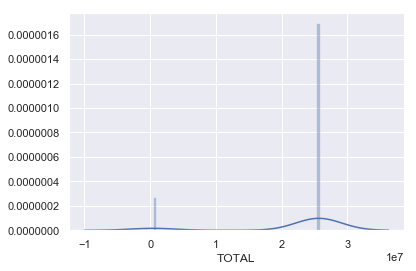

In [66]:
sns.distplot(mta_cleaned_data[mta_cleaned_data["STATION"] == "42 ST-PORT AUTH"]["TOTAL"].head(100))

In [69]:
mta_cleaned_data[(mta_cleaned_data["STATION"] == "42 ST-PORT AUTH") & (mta_cleaned_data["SCP"] == "01-00-02")].head(100)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
49087,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,01:00:00,REGULAR,179486,233373,412859
49088,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,05:00:00,REGULAR,179564,233388,412952
49089,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,09:00:00,REGULAR,179602,233469,413071
49090,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,13:00:00,REGULAR,179768,233796,413564
49091,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,17:00:00,REGULAR,180162,234285,414447
49092,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,21:00:00,REGULAR,180513,234827,415340
49093,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,01:00:00,REGULAR,180921,235004,415925
49094,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,05:00:00,REGULAR,181008,235029,416037
49095,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,09:00:00,REGULAR,181053,235103,416156
49096,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,13:00:00,REGULAR,181312,235325,416637


In [71]:
scp_42nd_street = mta_cleaned_data[(mta_cleaned_data["STATION"] == "42 ST-PORT AUTH")]["SCP"].unique()

array(['01-00-00', '01-00-01', '01-00-02', '01-00-03', '01-00-04',
       '01-00-05', '01-03-00', '01-05-00', '01-05-01', '01-03-01',
       '01-03-02', '01-03-03', '01-03-04', '00-00-00', '00-00-01',
       '00-00-02', '00-00-03', '00-00-04', '00-00-05', '00-05-00',
       '00-05-01', '00-06-00', '00-06-01', '02-00-00', '02-00-01',
       '02-00-02', '02-00-03', '02-00-04', '02-03-00', '02-03-01',
       '02-06-00', '02-06-01', '02-06-02', '00-00-06', '00-00-07',
       '00-00-08', '00-00-09'], dtype=object)

In [72]:
station_name = "23 ST"
mta_cleaned_data[(mta_cleaned_data["STATION"] == station_name)]["SCP"].unique()


array(['01-00-00', '01-00-01', '01-00-02', '01-03-00', '01-03-01',
       '01-03-02', '01-06-00', '01-06-01', '00-00-00', '00-00-01',
       '00-00-02', '00-03-00', '00-03-01', '00-03-02', '01-05-00',
       '01-05-01', '00-06-00', '00-06-01', '02-00-00', '02-00-01',
       '02-00-02', '02-06-00', '02-06-01', '02-06-02', '00-00-03',
       '00-00-04', '01-00-03', '02-03-00', '02-03-01', '02-05-00',
       '02-05-01', '02-05-02', '03-05-00', '03-05-01', '03-06-00',
       '03-06-01', '00-00-05', '00-05-00', '00-05-01', '02-05-05'], dtype=object)

In [75]:
mta_42nd_street_data = mta_cleaned_data[(mta_cleaned_data["STATION"] == "42 ST-PORT AUTH")]

In [96]:
    mta_42nd_street_data.groupby(['SCP'])[["ENTRIES","EXITS"]].agg('sum')

,ENTRIES,EXITS
SCP,,
00-00-00,16774242895,9935412208
00-00-01,2861782962458,394372804487
00-00-02,542253809775,499358642953
00-00-03,25072362439,12762327781
00-00-04,123132550455,1805973407337
00-00-05,3499170011126,2074228564773
00-00-06,3148255839014,4073300617399
00-00-07,63156534835,14409905333
00-00-08,923471421759,672735634309


In [93]:
mta_42nd_steet_data_group_by_SCP[["ENTRIES","EXITS"]].agg('sum')

,ENTRIES,EXITS
LINENAME,,
ACENGRS1237W,222705087932,147319827243
ACENQRS1237W,16606035374911,13596712225515


In [97]:
mta_42nd_street_data.groupby(['SCP'])[["ENTRIES","EXITS"]].agg('sum')

,ENTRIES,EXITS
SCP,,
00-00-00,16774242895,9935412208
00-00-01,2861782962458,394372804487
00-00-02,542253809775,499358642953
00-00-03,25072362439,12762327781
00-00-04,123132550455,1805973407337
00-00-05,3499170011126,2074228564773
00-00-06,3148255839014,4073300617399
00-00-07,63156534835,14409905333
00-00-08,923471421759,672735634309
